# Data analysis and machine learning model for bike rental dataset

## Data Analysis

In [1]:
from data_parser import DataParserFromUci
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Few settings for better display of data and figures

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

Using `DataParserFromUci` class to import clean dataframe using the URL. User can use `help(DataParserFromUci)` to get more information about the class.

In [3]:
url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
data_parser_instance = DataParserFromUci(url)
data_parser_instance.print_readme()

Use `read_csv(file_name)` class function read a file
Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport serv

In [4]:
hours_df = data_parser_instance.read_csv("hour.csv")
hours_df.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,timestamp
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,2011-01-01 00:00:00
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,2011-01-01 01:00:00
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,2011-01-01 02:00:00
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,2011-01-01 03:00:00
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,2011-01-01 04:00:00


In [5]:
hours_df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
hr                     int64
holiday                int64
weekday             category
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
timestamp     datetime64[ns]
dtype: object

In [6]:
hours_df.describe()

,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,11.546752,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.500008,6.914405,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,1.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,1.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


[Text(0.5, 1.0, 'Demand variation as per holiday')]

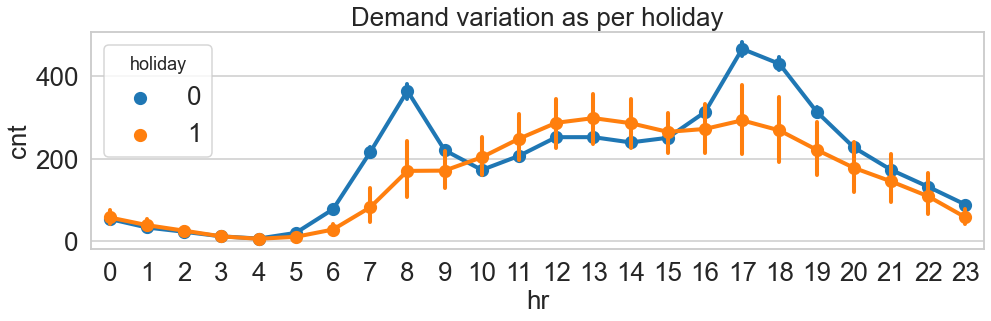

In [7]:
fig,ax = plt.subplots(figsize=(16,4))
sns.pointplot(data=hours_df[["hr","cnt","holiday"]],
              x="hr", y = "cnt", hue="holiday", ax=ax)
ax.set(title="Demand variation as per holiday")

[Text(0.5, 1.0, 'Demand variation as per season')]

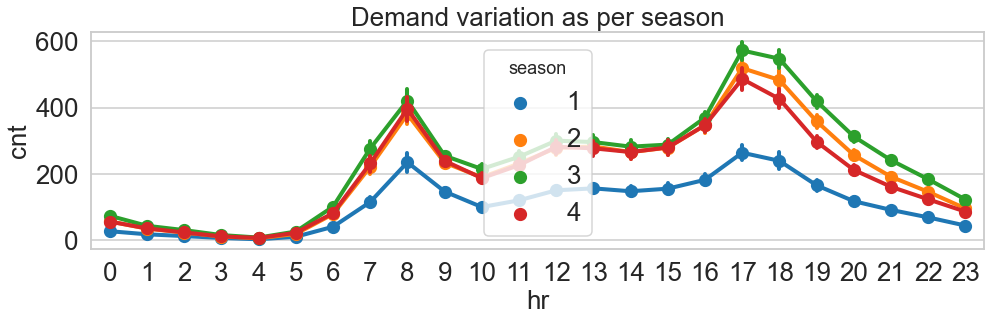

In [8]:
fig,ax = plt.subplots(figsize=(16,4))
sns.pointplot(data=hours_df[["hr","cnt","season"]],
              x="hr", y = "cnt", hue="season", ax=ax)
ax.set(title="Demand variation as per season")

[Text(0.5, 1.0, 'Demand variation as per weather')]

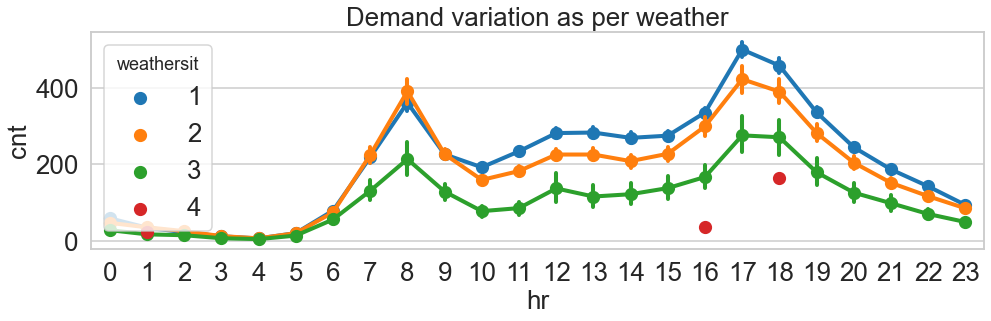

In [9]:
fig,ax = plt.subplots(figsize=(16,4))
sns.pointplot(data=hours_df[["hr","cnt","weathersit"]],
              x="hr", y="cnt", hue="weathersit", ax=ax)
ax.set(title="Demand variation as per weather")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

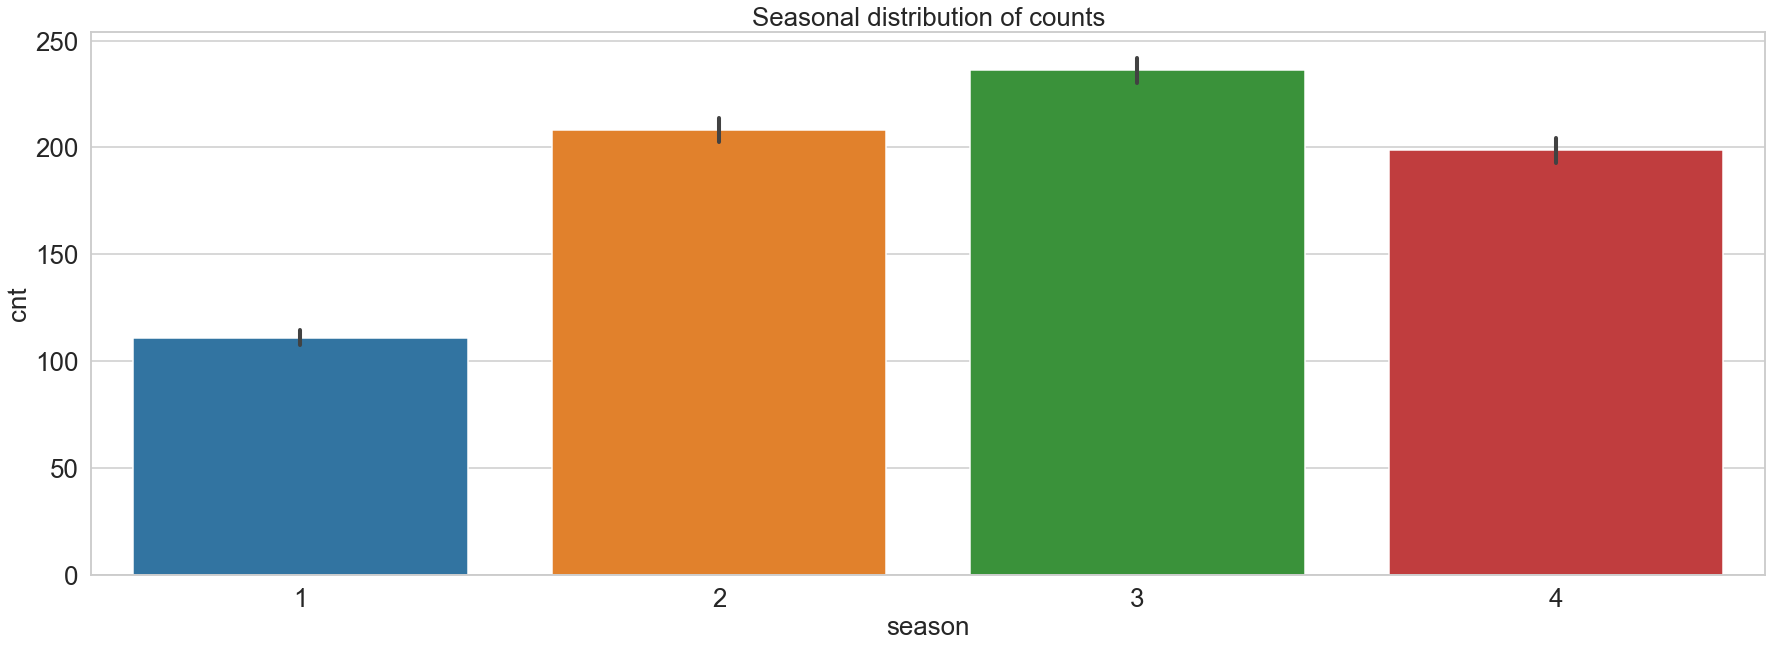

In [10]:
fig,ax = plt.subplots()
sns.barplot(data=hours_df[["season","cnt"]],
              x="season",y="cnt", ax=ax)
ax.set(title="Seasonal distribution of counts")

<AxesSubplot:>

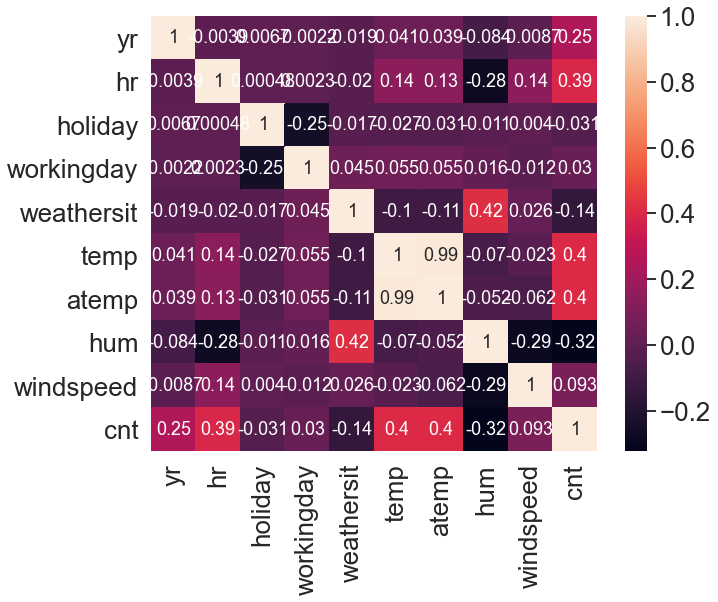

In [11]:
#hours_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(hours_df.corr(), annot=True)

From above, we can observe that real feel temperature `atemp` and temperature `temp` are correlated with `0.99` factor. So, we can remove either one of it. For this work, we'll remove `temp` because `atempt` provide a more realistic view of how people feels.

In [12]:
ml_df = hours_df.drop("temp", axis=1)
ml_df.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,timestamp
0,2011-01-01,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,16,2011-01-01 00:00:00
1,2011-01-01,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,40,2011-01-01 01:00:00


How does each variable affects the number of bikes? Using cross-correlation wrt. `cnt`

In [13]:
ml_df.drop('cnt', axis=1).corrwith(ml_df.cnt)

yr            0.250495
hr            0.394071
holiday      -0.030927
workingday    0.030284
weathersit   -0.142426
atemp         0.400929
hum          -0.322911
windspeed     0.093234
dtype: float64

In [14]:
ml_df = hours_df.drop(["dteday", "timestamp"], axis=1)
# RandomForest will work even without using OneHotEncoding
ml_df = pd.get_dummies(ml_df)
ml_df.head(2)

,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,1,0.24,0.2879,0.81,0.0,16,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0.22,0.2727,0.80,0.0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(ml_df.drop('cnt', axis=1), ml_df.cnt, test_size=0.25, random_state=5)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
rf = RandomForestRegressor(n_estimators=80, random_state=1, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)    
print("Train RMSE", mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MAD", mean_absolute_error(y_train, y_train_pred))
print("Test RMSE",mean_squared_error(y_test, y_test_pred, squared=False))
print("Test MAD", mean_absolute_error(y_test, y_test_pred))

Train RMSE 16.330603351717265
Train MAD 9.750869978182823
Test RMSE 43.1607399077287
Test MAD 25.976883897747822


Text(0, 0.5, 'cnt')

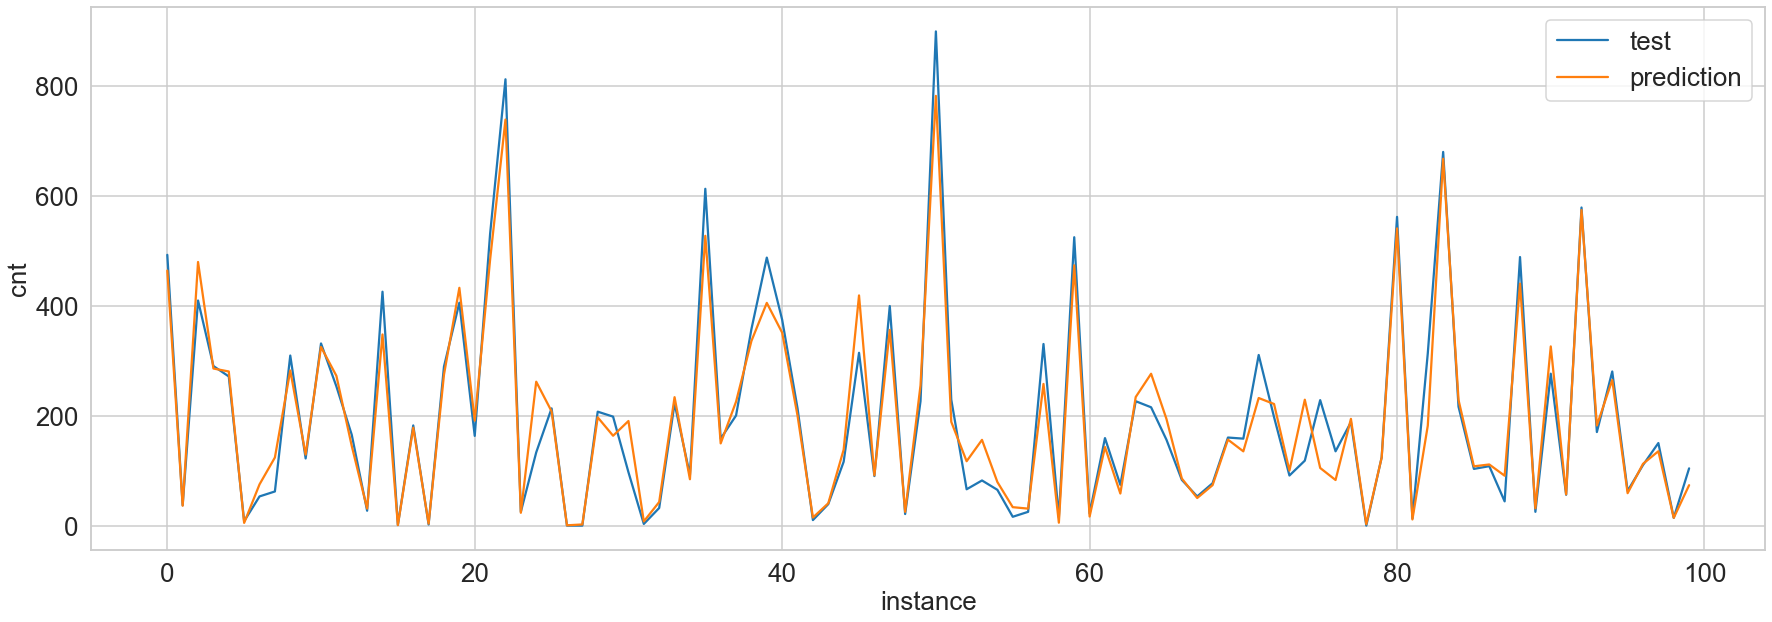

In [17]:
plt.plot(y_test[1000:1100].values, label="test")
plt.plot(y_test_pred[1000:1100], label="prediction")
plt.legend()
plt.xlabel("instance")
plt.ylabel("cnt")

Save the model

In [18]:
import joblib
joblib.dump(rf, "26102021_BikeRentalPrediction.sav")

['26102021_BikeRentalPrediction.sav']

For now, save a sample csv with features which can be use to show deployment part.

In [19]:
X_test.tail(1).to_csv("test_dataset/test_parameters.csv", index=False)

Seeing which features are important in RandomForest

In [20]:
feats = {}
for feature, importance in zip(ml_df.columns, rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

Text(0.5, 1.0, 'Feature Importance')

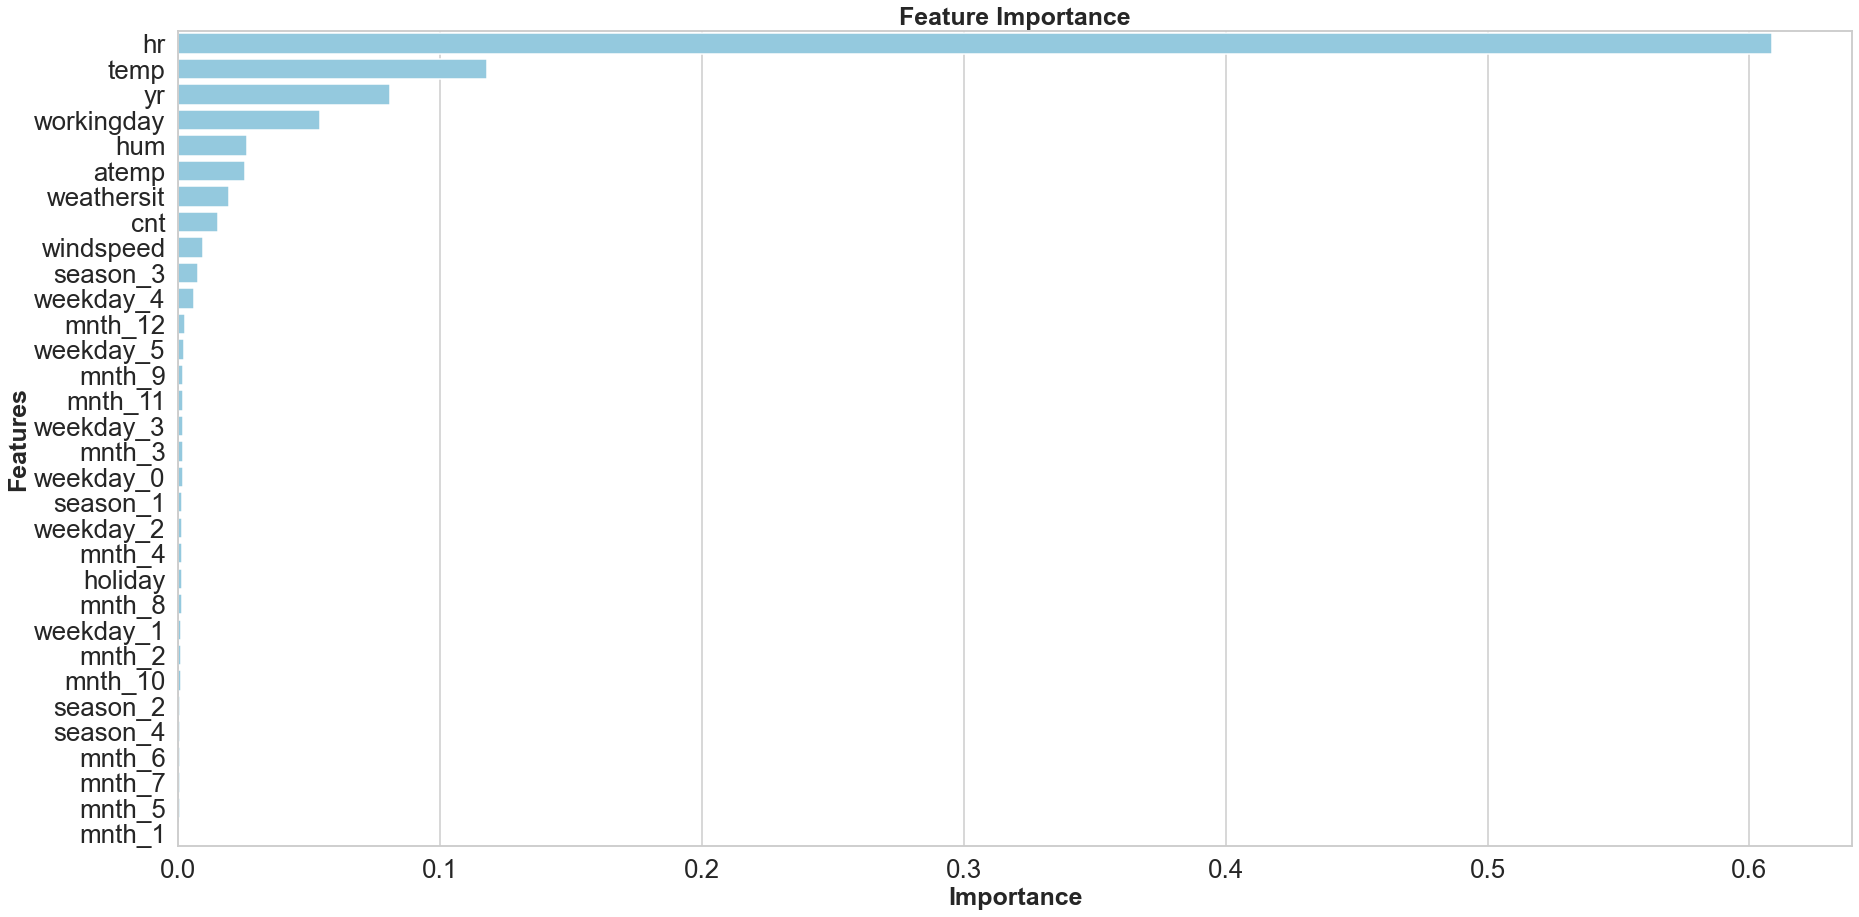

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

# RandomForest with *linear* dimensionality reduction
For the same, we will use PCA. --> **Incomplete**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train)
np.sum(pca.explained_variance_ratio_)

In [ ]:
X_train_pca =  pd.DataFrame(pca.transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))

In [ ]:
X_train_pca.shape